## Part 1: Building up a basic predictive model

### Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Updated_data.csv')
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,number_diagnoses,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Female,[70-80),1,22,7,7,MC,Orthopedics-Reconstructive,58,2,...,9,No,No,No,Up,No,Steady,Ch,Yes,0
1,Female,[60-70),2,1,1,3,MC,Nephrology,59,3,...,6,No,No,No,No,No,Steady,No,Yes,0
2,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,...,6,No,No,No,No,No,No,No,Yes,0
3,Male,[70-80),1,2,7,10,MC,InternalMedicine,68,1,...,6,Steady,No,No,No,No,Steady,Ch,Yes,0
4,Female,[70-80),1,3,6,12,UN,InternalMedicine,77,5,...,5,No,No,No,No,No,Steady,No,Yes,0


#### Plot the distribution of unique classes of the target variable, i.e., readmitted.  

In [2]:
import plotly.express as px

# Create a DataFrame with counts of each unique class of 'readmitted'
readmitted_counts = df['readmitted'].value_counts().reset_index()
readmitted_counts.columns = ['Readmission Status', 'Count']

# Create an interactive bar chart using Plotly
fig = px.bar(readmitted_counts, x='Readmission Status', y='Count', color='Readmission Status',
             title='Distribution of Unique Classes of "readmitted"',
             labels={'Count': 'Count'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.show()


#### Plot the count of number of readmitted cases against age.

In [3]:
# Group the data by age and readmitted status and count the occurrences
grouped_df = df.groupby(['age', 'readmitted']).size().reset_index(name='count')

# Create an interactive bar plot using Plotly Express
fig = px.bar(grouped_df, x='age', y='count', color='readmitted',
             title='Count of Readmitted Cases against Age',
             labels={'count': 'Count', 'age': 'Age'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

#### Plot a graph that displays the count of target variable against the number of medications. 

In [4]:
# Group the data by 'num_medications' and 'readmitted', and count occurrences
grouped_df = df.groupby(['num_medications', 'readmitted']).size().reset_index(name='count')

# Create an interactive bar plot using Plotly Express
fig = px.bar(grouped_df, x='num_medications', y='count', color='readmitted',
             title='Count of Readmitted Cases against Number of Medications',
             labels={'count': 'Count', 'num_medications': 'Number of Medications'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.update_layout(xaxis_title='Number of Medications', yaxis_title='Count')
fig.show()

#### Show the scatter matrix plot and the correlation matrix. This should be a very large matrix and you might find it difficult to analyse. Which pair of features are highly correlated?

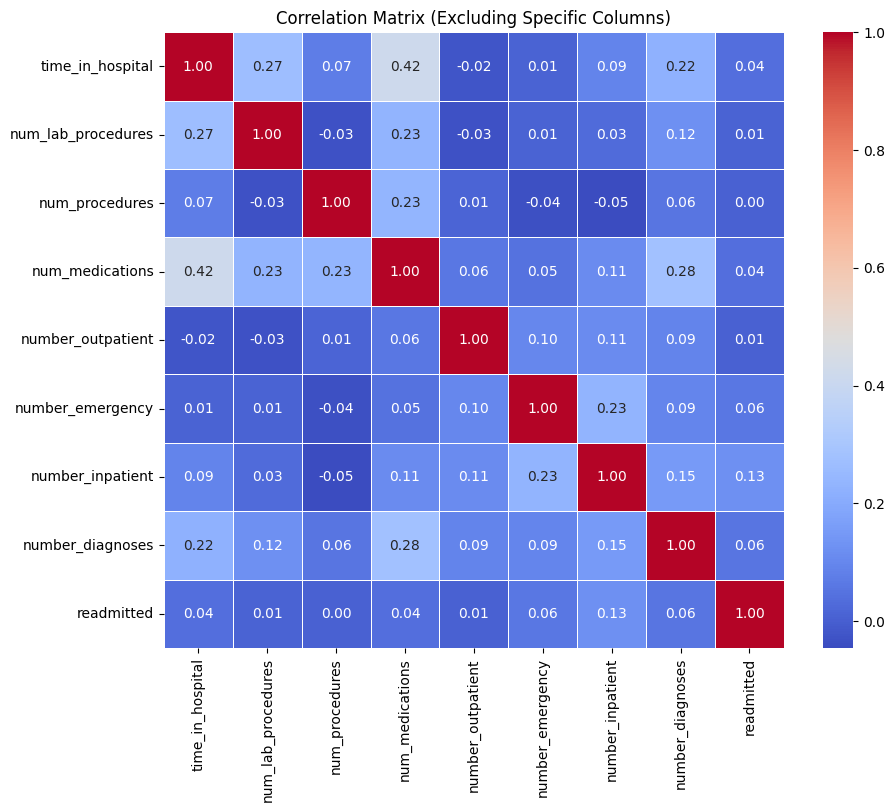

In [5]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculating correlation matrix excluding specific columns
columns_to_exclude = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
correlation_matrix = numeric_df.drop(columns_to_exclude, axis=1).corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Excluding Specific Columns)')
plt.show()

#### Additional Plots

#### 1) Distribution of Age

In [6]:
fig = px.histogram(df, x='age', title='Distribution of Age', nbins=20)
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

#### 2) Number of Medications by Age

In [7]:
fig = px.box(df, x='age', y='num_medications', title='Number of Medications by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Number of Medications')
fig.show()

#### 3) Readmission Status by Age and Gender

In [8]:
fig = px.histogram(df, x='age', color='readmitted', facet_col='gender', barmode='group', title='Readmission Status by Age and Gender')
fig.update_layout(xaxis_title='Age', yaxis_title='Count', legend_title='Readmission Status')
fig.show()